# Imports

In [239]:
!pip install stumpy
#!pip install --upgrade pip

In [1]:
import pandas as pd
import os

%matplotlib inline

import seaborn as sns
import pandas as pd
# import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

sns.set_style('darkgrid')

# Reading

In [4]:
DIR1 = '../data/'
FILE1 = 'gases-br.xlsx'
URL = os.path.join(DIR1, FILE1)
data = pd.read_excel(URL, sheet_name='GEE Estados')

c:\Users\danic\anaconda3\envs\bigdata-un\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Filter dataset

In [302]:
ages = range(1990, 2022)
drop_ages = range(1970, 1990)

In [303]:
data_co2 = data[data['Gás'].str.contains('CO2')].copy()
data_co2 = data[data['Gás'].str.contains('GWP')].copy()

In [304]:
data_co2_state = data_co2[data_co2['Estado'].str.contains('BR') == False].copy()

In [305]:
data_co2_state = data_co2_state[data_co2_state['Emissão / Remoção / Bunker'].str.contains('Emissão')].copy()

In [306]:
#data_co2_state.drop(drop_ages,axis=1,inplace=True)

In [307]:
data_co2_state.drop(['Emissão / Remoção / Bunker',
                    'Produto',
                    'Nível 4',
                    'Nível 6'],inplace=True,axis=1)

# Select features

In [308]:
quali_columns = ['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Gás', 'Atividade Econômica']
list_features = quali_columns + list(ages)
data_co2_state[list_features]

,Nível 1 - Setor,Nível 2,Nível 3,Gás,Atividade Econômica,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,CO2e (t) GWP-AR2,OUTRA_IND,2.675300e+06,3.487500e+06,3.227100e+06,4.290400e+06,4.336900e+06,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,4.030000e+04
8,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,CO2e (t) GWP-AR2,OUTRA_IND,3.820078e+04,4.055122e+04,3.953393e+04,4.164936e+04,4.167285e+04,...,13146.761156,12817.510091,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,1.369724e+04
12,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,CO2e (t) GWP-AR2,OUTRA_IND,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
16,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,CO2e (t) GWP-AR2,OUTRA_IND,5.228992e+05,5.577488e+05,5.463661e+05,5.783506e+05,5.814272e+05,...,224146.845165,218533.250555,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,2.335323e+05
21,Processos Industriais,Indústria Química,Produção de Acrilonitrila,CO2e (t) GWP-AR2,OUTRA_IND,1.842984e+04,1.499669e+04,1.752229e+04,1.754568e+04,1.808062e+04,...,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,2.232870e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103239,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,CO2e (t) GWP-AR4,AGROPEC,1.001566e+06,1.209800e+06,1.251756e+06,7.031220e+05,7.078610e+05,...,418605.000000,478233.000000,420563.000000,347757.000000,418509.000000,372417.000000,391500.000000,417976.000000,835377.000000,9.608320e+05
103240,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,CO2e (t) GWP-AR5,AGROPEC,3.899590e+05,5.005510e+05,4.245230e+05,2.995260e+05,5.346530e+05,...,126287.000000,127027.000000,192955.000000,163906.000000,233540.000000,189634.000000,162271.000000,185341.000000,366652.000000,4.404090e+05
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,CO2e (t) GWP-AR5,AGROPEC,1.059422e+06,1.277008e+06,1.323244e+06,7.431760e+05,7.474880e+05,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000000,871393.000000,1.004191e+06
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,CO2e (t) GWP-AR6,AGROPEC,3.915400e+05,5.025740e+05,4.261840e+05,3.007070e+05,5.367440e+05,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000000,368149.000000,4.431200e+05


In [309]:
for quali in quali_columns:
    tmp = pd.get_dummies(data_co2_state[quali])
    #print(data_co2_state.columns)
    #data_co2_state.drop(quali, inplace=True)
    data_co2_state[tmp.columns] = tmp

In [310]:
data_co2_state.drop(quali_columns,axis=1,inplace=True)

In [311]:
data_co2_state.isna().sum().sort_values(ascending=False)

Nível 5                      972
Diretas                        0
Produção de Amônia             0
Produção de Alumínio           0
Produção de Acrilonitrila      0
                            ... 
2005                           0
2004                           0
2003                           0
2002                           0
TRAN_PASS                      0
Length: 125, dtype: int64

In [312]:
data_co2_state.index = range(data_co2_state.shape[0])

In [313]:
data_co2_state.to_csv('processed_dataset.csv')

In [314]:
data_co2_state[list(drop_ages)+list(ages)+['Estado']].groupby('Estado').sum()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Estado,,,,,,,,,,,,,,,,,,,,,
AC,1.105732e+06,1.131098e+06,1.201568e+06,1.272399e+06,1.350143e+06,1.488269e+06,1.628452e+06,1.768051e+06,1.889374e+06,2.078851e+06,...,8.613298e+07,1.036239e+08,1.013085e+08,1.222412e+08,1.127591e+08,1.259677e+08,1.384143e+08,1.777150e+08,1.647061e+08,1.761086e+08
AL,5.900289e+06,6.276962e+06,6.720619e+06,7.004166e+06,7.378853e+06,7.753474e+06,8.073958e+06,8.590704e+06,9.128799e+06,9.864192e+06,...,4.592124e+07,4.670200e+07,4.588061e+07,4.456729e+07,4.417068e+07,4.644952e+07,4.120627e+07,4.167715e+07,4.231203e+07,4.527304e+07
AM,3.457146e+06,3.663611e+06,3.882448e+06,4.105284e+06,4.315394e+06,3.354887e+06,3.521298e+06,3.606432e+06,3.862687e+06,4.054286e+06,...,1.970329e+08,2.478287e+08,2.412365e+08,3.421570e+08,4.880572e+08,3.105633e+08,3.227204e+08,4.825850e+08,5.699372e+08,5.596632e+08
AP,7.351689e+05,8.311868e+05,9.037253e+05,9.764451e+05,1.051278e+06,8.720725e+05,9.129161e+05,8.984275e+05,9.869405e+05,9.797813e+05,...,4.285355e+07,2.155711e+07,2.201493e+07,2.243956e+07,4.046843e+07,3.394389e+07,2.420680e+07,1.533337e+07,1.028475e+07,1.818138e+07
BA,6.080987e+07,6.372085e+07,6.625967e+07,6.881156e+07,7.167491e+07,8.665304e+07,9.189722e+07,9.268045e+07,9.509378e+07,9.697950e+07,...,4.751151e+08,4.853525e+08,4.576582e+08,4.410497e+08,4.099918e+08,4.136208e+08,3.794743e+08,3.636177e+08,3.979832e+08,4.004723e+08
CE,1.964655e+07,2.065040e+07,2.159926e+07,2.250254e+07,2.339202e+07,2.459147e+07,2.476654e+07,2.507571e+07,2.562081e+07,2.637048e+07,...,1.279243e+08,1.258698e+08,1.402316e+08,1.408555e+08,1.272939e+08,1.315423e+08,1.116138e+08,1.129841e+08,1.043198e+08,1.201568e+08
DF,5.192655e+05,5.484010e+05,6.339037e+05,1.160073e+06,1.214843e+06,1.350313e+06,1.508368e+06,1.762220e+06,1.808124e+06,2.009741e+06,...,3.064733e+07,3.151971e+07,3.479256e+07,3.562083e+07,3.240953e+07,3.161046e+07,2.868397e+07,2.867696e+07,2.617855e+07,2.934370e+07
ES,1.454286e+07,1.590608e+07,1.676029e+07,1.750536e+07,1.828524e+07,2.169815e+07,2.342568e+07,2.390930e+07,2.344243e+07,2.189745e+07,...,1.327561e+08,1.416471e+08,1.483132e+08,1.487987e+08,1.366126e+08,1.364822e+08,1.316570e+08,1.254074e+08,1.221247e+08,1.414770e+08
GO,7.603353e+07,8.283587e+07,8.988506e+07,9.686918e+07,1.041693e+08,1.200422e+08,1.288559e+08,1.305373e+08,1.345891e+08,1.427085e+08,...,4.046955e+08,4.149771e+08,4.203187e+08,4.214946e+08,4.021557e+08,4.027098e+08,3.946044e+08,3.965751e+08,3.990925e+08,4.281962e+08


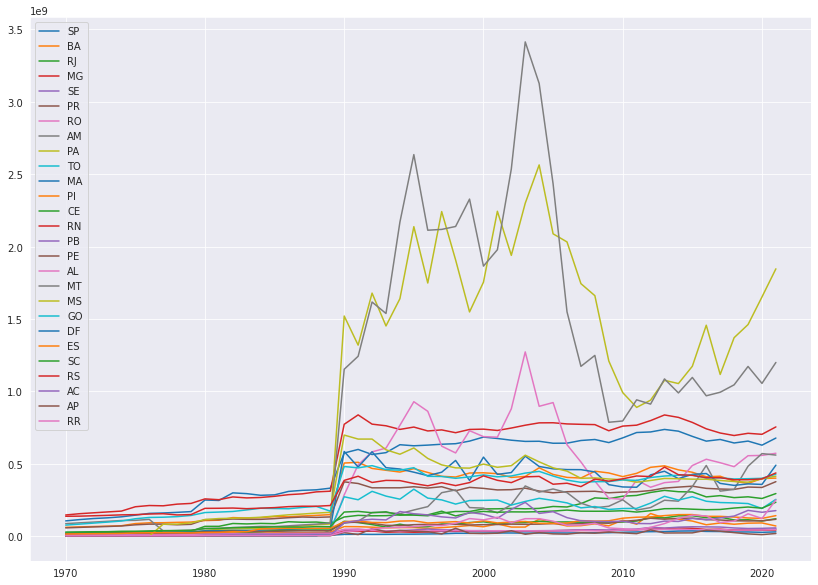

In [315]:
plt.figure(figsize=(14,10))
for i in data_co2_state['Estado'].unique():
    data_co2_state[list(drop_ages)+ list(ages)+['Estado']].groupby('Estado').sum().loc[i,:].plot(label=i)
    plt.legend()
plt.show()

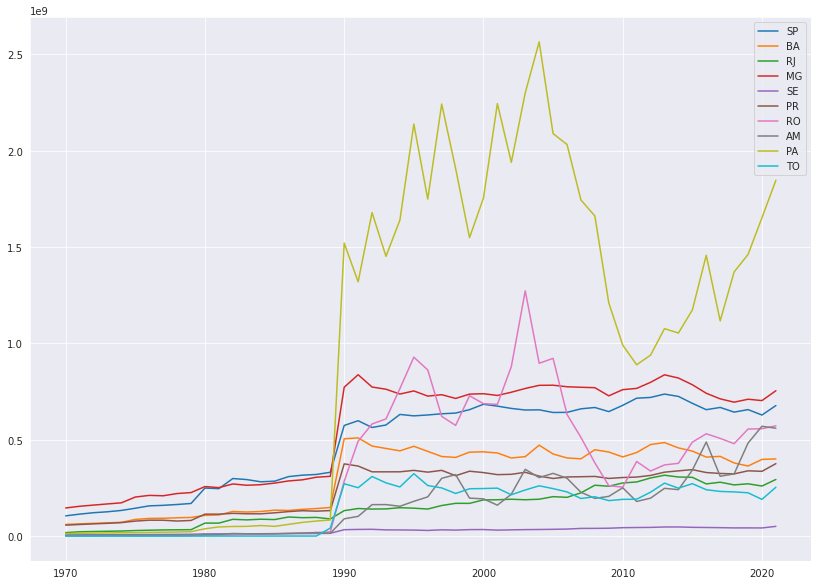

In [316]:
plt.figure(figsize=(14,10))
for i in data_co2_state['Estado'].unique()[:10]:
    data_co2_state[list(drop_ages)+ list(ages)+['Estado']].groupby('Estado').sum().loc[i,:].plot(label=i)
    plt.legend()
plt.show()

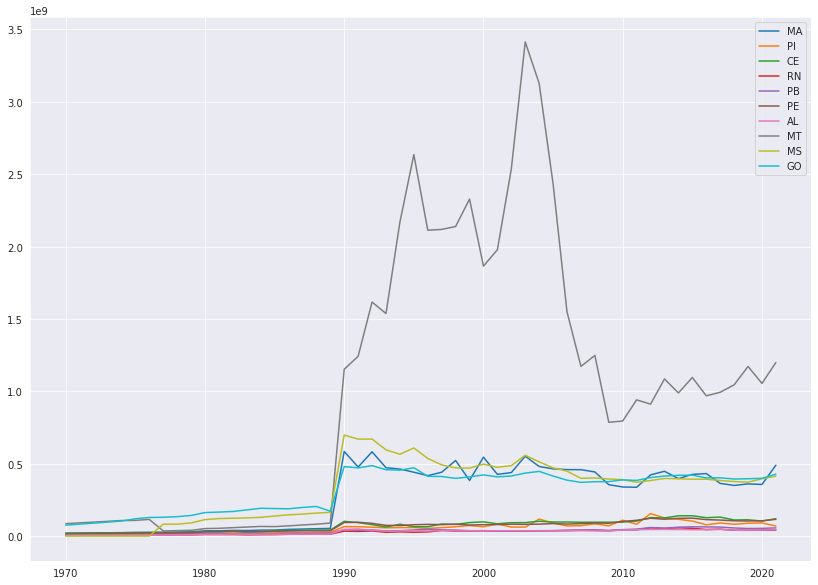

In [317]:
plt.figure(figsize=(14,10))
for i in data_co2_state['Estado'].unique()[10:20]:
    data_co2_state[list(drop_ages)+ list(ages)+['Estado']].groupby('Estado').sum().loc[i,:].plot(label=i)
    plt.legend()
plt.show()

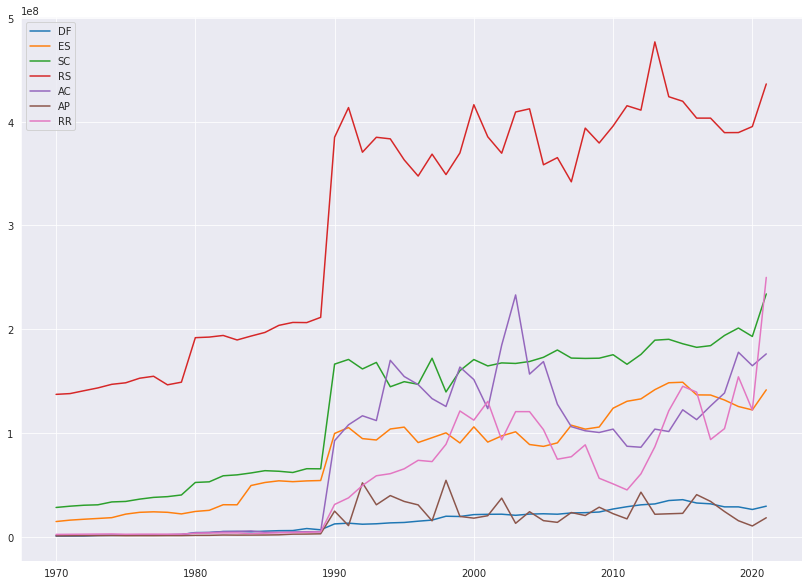

In [318]:
plt.figure(figsize=(14,10))
for i in data_co2_state['Estado'].unique()[20:]:
    data_co2_state[list(drop_ages)+ list(ages)+['Estado']].groupby('Estado').sum().loc[i,:].plot(label=i)
    plt.legend()
plt.show()

# Time series analysis

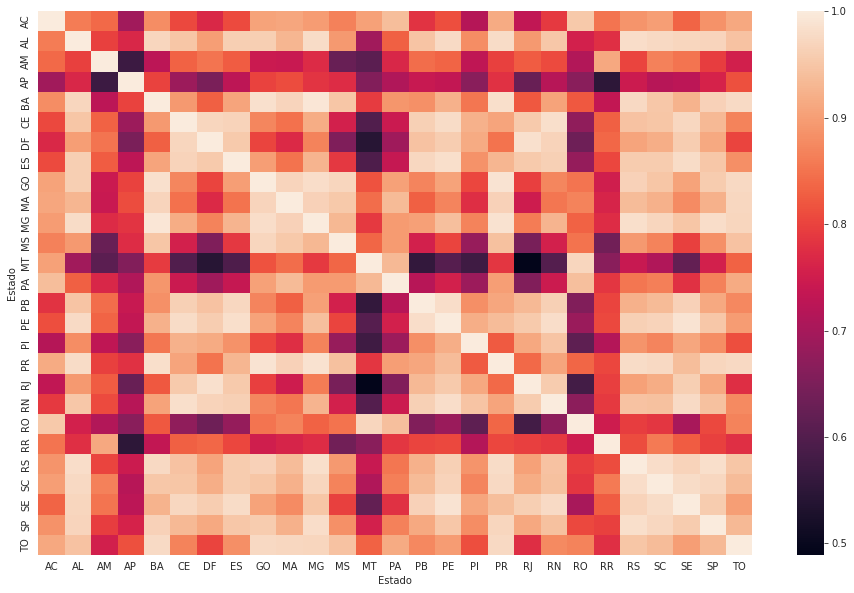

In [321]:
plt.figure(figsize=(16,10))
sns.heatmap(data_gwp.T.corr())
plt.show()

In [336]:
np.sort(data_gwp.T.corr()['AC'])[-2]
#np.sort(, axis=None)

0.9533271143062741

In [337]:
data_gwp.T.corr().apply(lambda x: np.where(x == np.sort(x)[-2])[0][0],axis=1)

Estado
AC    20
AL    22
AM    21
AP    26
BA    10
CE    19
DF    18
ES    15
GO    17
MA    26
MG     4
MS     8
MT    20
PA    20
PB    15
PE    24
PI    19
PR     8
RJ     6
RN     5
RO    12
RR     2
RS    25
SC    22
SE    15
SP    22
TO     4
dtype: int64

In [339]:
data_gwp.to_csv('groupby_per_year_state.csv')

In [319]:
data_gwp = data_co2_state[list(drop_ages)+ list(ages)+['Estado']].groupby('Estado').sum().copy()

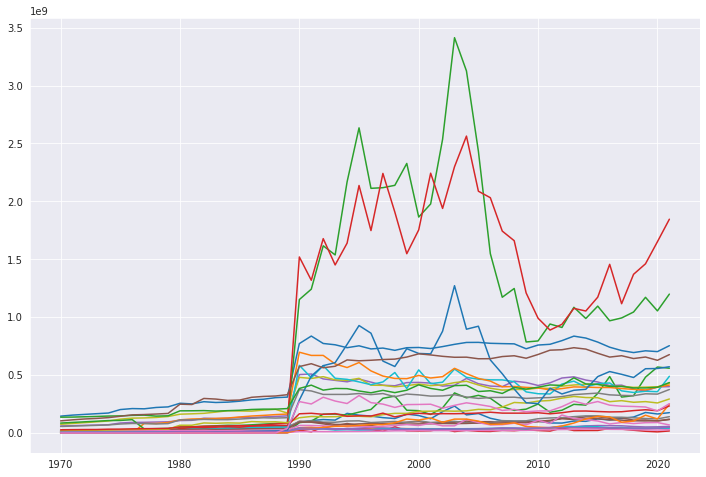

In [322]:
plt.figure(figsize=(12,8))
plt.plot(data_gwp.T)
plt.show()

In [323]:
data_gwp.shape

(27, 52)

In [340]:
data_gwp

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Estado,,,,,,,,,,,,,,,,,,,,,
AC,1.105732e+06,1.131098e+06,1.201568e+06,1.272399e+06,1.350143e+06,1.488269e+06,1.628452e+06,1.768051e+06,1.889374e+06,2.078851e+06,...,8.613298e+07,1.036239e+08,1.013085e+08,1.222412e+08,1.127591e+08,1.259677e+08,1.384143e+08,1.777150e+08,1.647061e+08,1.761086e+08
AL,5.900289e+06,6.276962e+06,6.720619e+06,7.004166e+06,7.378853e+06,7.753474e+06,8.073958e+06,8.590704e+06,9.128799e+06,9.864192e+06,...,4.592124e+07,4.670200e+07,4.588061e+07,4.456729e+07,4.417068e+07,4.644952e+07,4.120627e+07,4.167715e+07,4.231203e+07,4.527304e+07
AM,3.457146e+06,3.663611e+06,3.882448e+06,4.105284e+06,4.315394e+06,3.354887e+06,3.521298e+06,3.606432e+06,3.862687e+06,4.054286e+06,...,1.970329e+08,2.478287e+08,2.412365e+08,3.421570e+08,4.880572e+08,3.105633e+08,3.227204e+08,4.825850e+08,5.699372e+08,5.596632e+08
AP,7.351689e+05,8.311868e+05,9.037253e+05,9.764451e+05,1.051278e+06,8.720725e+05,9.129161e+05,8.984275e+05,9.869405e+05,9.797813e+05,...,4.285355e+07,2.155711e+07,2.201493e+07,2.243956e+07,4.046843e+07,3.394389e+07,2.420680e+07,1.533337e+07,1.028475e+07,1.818138e+07
BA,6.080987e+07,6.372085e+07,6.625967e+07,6.881156e+07,7.167491e+07,8.665304e+07,9.189722e+07,9.268045e+07,9.509378e+07,9.697950e+07,...,4.751151e+08,4.853525e+08,4.576582e+08,4.410497e+08,4.099918e+08,4.136208e+08,3.794743e+08,3.636177e+08,3.979832e+08,4.004723e+08
CE,1.964655e+07,2.065040e+07,2.159926e+07,2.250254e+07,2.339202e+07,2.459147e+07,2.476654e+07,2.507571e+07,2.562081e+07,2.637048e+07,...,1.279243e+08,1.258698e+08,1.402316e+08,1.408555e+08,1.272939e+08,1.315423e+08,1.116138e+08,1.129841e+08,1.043198e+08,1.201568e+08
DF,5.192655e+05,5.484010e+05,6.339037e+05,1.160073e+06,1.214843e+06,1.350313e+06,1.508368e+06,1.762220e+06,1.808124e+06,2.009741e+06,...,3.064733e+07,3.151971e+07,3.479256e+07,3.562083e+07,3.240953e+07,3.161046e+07,2.868397e+07,2.867696e+07,2.617855e+07,2.934370e+07
ES,1.454286e+07,1.590608e+07,1.676029e+07,1.750536e+07,1.828524e+07,2.169815e+07,2.342568e+07,2.390930e+07,2.344243e+07,2.189745e+07,...,1.327561e+08,1.416471e+08,1.483132e+08,1.487987e+08,1.366126e+08,1.364822e+08,1.316570e+08,1.254074e+08,1.221247e+08,1.414770e+08
GO,7.603353e+07,8.283587e+07,8.988506e+07,9.686918e+07,1.041693e+08,1.200422e+08,1.288559e+08,1.305373e+08,1.345891e+08,1.427085e+08,...,4.046955e+08,4.149771e+08,4.203187e+08,4.214946e+08,4.021557e+08,4.027098e+08,3.946044e+08,3.965751e+08,3.990925e+08,4.281962e+08
